# Exploratory Anlysis of HC data

In [1]:
# module imports
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
path = r'C:\Users\awnet\Documents\GitHub\HCAHPSPatientSurvey\HCAHPSPatientSurveyFiles\data_tables'

In [4]:
##names = ['measures','national_results','questions','reports','responses','states','state_results']
df_list = []
os.chdir(path)
for file in os.listdir():
    if file.endswith(".csv"):
        df_list.append(pd.read_csv(file))

In [5]:
measures_df = df_list[0]
national_results_df = df_list[1]
questions_df = df_list[2]
reports_df = df_list[3]
responses_df = df_list[4]
states_df = df_list[5]
state_results_df = df_list[6]

In [6]:
responses_df.head()

,Release Period,State,Facility ID,Completed Surveys,Response Rate (%)
0,07_2015,AL,10001,300 or more,27
1,07_2015,AL,10005,300 or more,37
2,07_2015,AL,10006,300 or more,25
3,07_2015,AL,10007,Between 100 and 299,30
4,07_2015,AL,10008,Fewer than 100,28


In [7]:
responses_df['Release Period'] = responses_df['Release Period'].str.replace('_','/')

In [8]:
responses_df.dtypes

Release Period       object
State                object
Facility ID          object
Completed Surveys    object
Response Rate (%)    object
dtype: object

In [9]:

##Remove rows and facility ID's that produced not available.  It is unclear why they are not available.
##Could be do to no participating, not sharing, or combination of other factors.

not_available = responses_df[ (responses_df['Response Rate (%)'] == 'Not Available')].index
responses_df.drop(not_available , inplace=True)

responses_df['Response Rate (%)'] = responses_df['Response Rate (%)'].astype(np.int64)

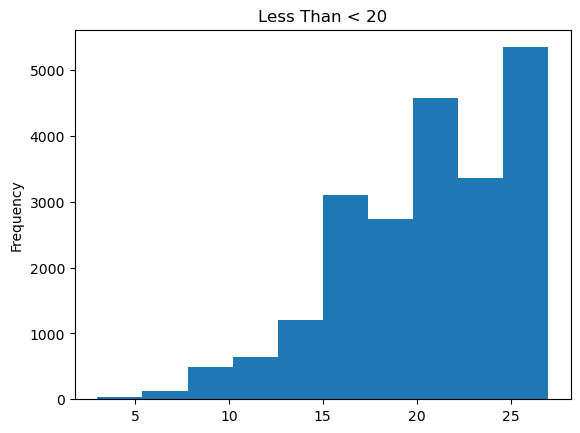

In [10]:
%matplotlib inline
outliers = responses_df[responses_df['Response Rate (%)']<28]
_=outliers['Response Rate (%)'].plot.hist(title="Less Than < 20")

In [11]:
avg = np.mean(responses_df['Response Rate (%)'])
sd = np.std(responses_df['Response Rate (%)'])

# Find upper and lower bound for outliers
print('The average response rate is: "{0:0.2f}"'.format(avg))
print('The standard deviation of response rate is: "{0:0.2f}"'.format(sd))



The average response rate is: "26.61"
The standard deviation of response rate is: "9.16"


In [12]:
def normalize(df, pd_series_name, nsd=2):
    '''
    Take all values that are outside some bound (mean +- 2 sd by default)
    and convert them to the appropriate bound.
    '''
    df = df.copy()
    pd_series = df[pd_series_name].astype(float)

    # Find upper and lower bound for outliers
    avg = np.mean(pd_series)
    sd  = np.std(pd_series)

    # Calculate the bounds
    lower_bound = avg - nsd*sd
    upper_bound = avg + nsd*sd

    # Collapse in the outliers: replace them with appropriate bound
    df.loc[pd_series < lower_bound , pd_series_name ] = lower_bound
    df.loc[pd_series > upper_bound , pd_series_name ] = upper_bound
    
    return (df[pd_series_name] - avg) / sd

In [13]:
responses_df_normalized = responses_df.copy()

In [14]:
responses_df_normalized['Responses Normalized'] = normalize(responses_df,'Response Rate (%)')

In [15]:
responses_df_normalized

,Release Period,State,Facility ID,Completed Surveys,Response Rate (%),Responses Normalized
0,07/2015,AL,10001,300 or more,27,0.042692
1,07/2015,AL,10005,300 or more,37,1.134928
2,07/2015,AL,10006,300 or more,25,-0.175755
3,07/2015,AL,10007,Between 100 and 299,30,0.370363
4,07/2015,AL,10008,Fewer than 100,28,0.151916
...,...,...,...,...,...,...
43207,07/2023,TX,670143,42,28,0.151916
43208,07/2023,TX,670259,34,34,0.807257
43209,07/2023,TX,670260,454,14,-1.377216
43214,07/2023,TX,670300,186,15,-1.267992
